In [1]:
import pandas as pd
import numpy as np

In [2]:
from id3 import export_graphviz
from os import system
from sklearn import tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Reading training dataset

In [4]:
filename = r'C:\Users\seema\Documents\Jupyter\AIML L2A\Data Sets\BankNote_Authentication.csv'
df = pd.read_csv(filename)

In [5]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [6]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

## Preparing the input and output array data

In [7]:
inputx = np.array(df.drop('class',axis=1))

In [8]:
inputy = np.array(df['class'])

In [9]:
feature_names = ['variance','skewness','curtosis','entropy']

## Training the data prepared using the decision tree model

##### ID3  (Information Gain)

In [10]:
#implementing ID3 and CART since C4.5 is similar to CART

decision_tree_Igain = tree.DecisionTreeClassifier(criterion="entropy",random_state = 1)
decision_tree_Igain_ = decision_tree_Igain.fit(inputx, inputy)
print("Decision Tree Using Information Gain Score:", decision_tree_Igain_.score(inputx, inputy)) 

Decision Tree Using Information Gain Score: 1.0


In [11]:
tree.export_graphviz(decision_tree_Igain_, feature_names = feature_names, out_file="BankNote_tree_Igain.dot")

In [12]:
system("dot -Tpng BankNote_tree_Igain.dot -o BankNote_Decision_Tree_IGain.png")

0

##### CART  (Gini Index)

In [13]:
decision_tree_gini = tree.DecisionTreeClassifier(criterion="gini",random_state = 1)
decision_tree_gini_ = decision_tree_gini.fit(inputx, inputy)
print("Decision Tree Using Gini Score:", decision_tree_gini_.score(inputx, inputy))

Decision Tree Using Gini Score: 1.0


In [14]:
tree.export_graphviz(decision_tree_gini_, feature_names = feature_names, out_file="BankNote_tree_gini.dot")

In [15]:
system("dot -Tpng BankNote_tree_gini.dot -o BankNote_Decision_Tree_gini.png")

0

## Plotting the result using cross validation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ID3:[ Accuracy = 98.469798 ; Standard Deviation = (0.009463)]
Gini:[ Accuracy = 98.176240 ; Standard Deviation = (0.011892)]


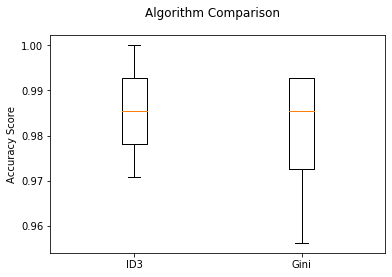

In [16]:
models = [decision_tree_Igain,decision_tree_gini]
results = []
names = ['ID3','Gini']
scoring = 'accuracy'
for model,name in zip(models,names):
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, inputx, inputy, cv=kfold, scoring=scoring)
    results.append(cv_results)
    
    msg = "%s:[ %s %f %s (%f)]" % (name,'Accuracy =', cv_results.mean()*100, '; Standard Deviation =', cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy Score')
pyplot.show()